In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_gene = pd.read_csv('gene_expression.csv')

In [3]:
data_gene

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


In [4]:
data_gene.columns = ['gene1','gene2','cp']

<Axes: xlabel='gene1', ylabel='gene2'>

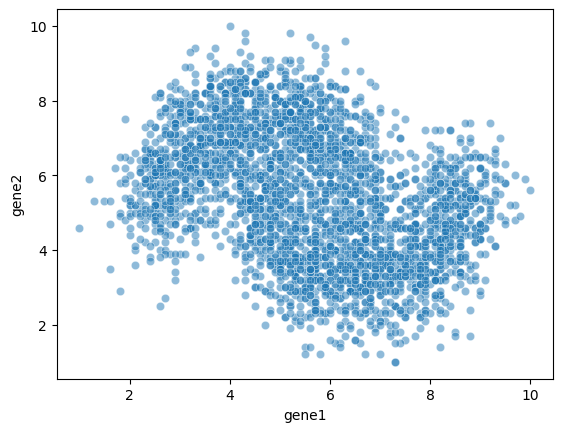

In [5]:
sns.scatterplot(x='gene1', y='gene2', data=data_gene, alpha=0.5)

<Axes: xlabel='gene1', ylabel='gene2'>

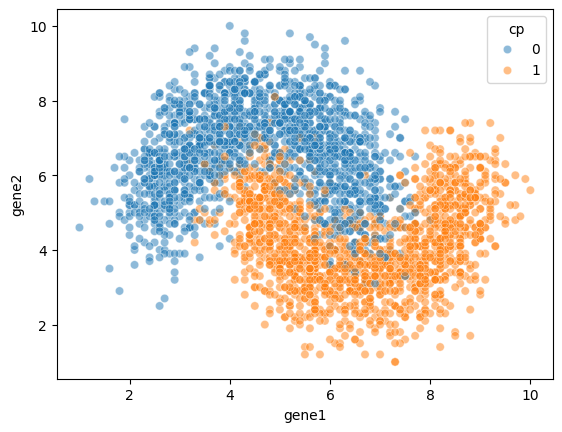

In [6]:
sns.scatterplot(x='gene1', y='gene2', data=data_gene, alpha=0.5,  hue='cp')

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
X = data_gene.drop('cp', axis=1)
y = data_gene['cp']

In [10]:
X

,gene1,gene2
0,4.3,3.9
1,2.5,6.3
2,5.7,3.9
3,6.1,6.2
4,7.4,3.4
...,...,...
2995,5.0,6.5
2996,3.4,6.6
2997,2.7,6.5
2998,3.3,5.6


In [11]:
y

0       1
1       0
2       1
3       0
4       1
       ..
2995    1
2996    0
2997    0
2998    0
2999    0
Name: cp, Length: 3000, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn_model = KNeighborsClassifier(n_neighbors=1)


In [16]:
knn_model.fit(X_train, y_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [24]:
(knn_model.predict(X_test) - y_test)

1801    0
1190    0
1817    0
251     0
2505    0
       ..
104     0
2087    1
599     0
1756    0
1323   -1
Name: cp, Length: 600, dtype: int64

c:\Users\agent\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'KNN Decision Boundary')

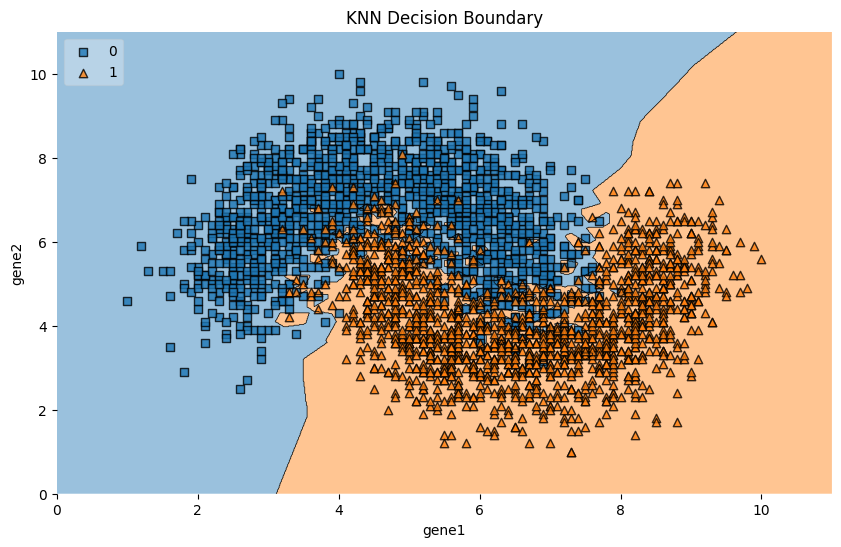

In [28]:
# boundary around the actual data using knn_model
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(10, 6))
plot_decision_regions(X.values, y.values, clf=knn_model, legend=2)
plt.xlabel('gene1')
plt.ylabel('gene2')
plt.title('KNN Decision Boundary')

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 6.8 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 6.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
